In [28]:
%load_ext autoreload
%autoreload 2
import fmuSimulation.gymFMUchecker as gymFMUChecker

import os
from fmuSimulation.configReader import configReader
import numpy as np
import sys

config = os.path.abspath('Example.cfg')
cfg = configReader(config)
config = cfg.getMulti(cfg.getSections())
config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'DEFAULT': {},
 'General': {'DEBUG': False, 'LOG': False, 'Href': 10},
 'FMU': {'fmuPath': '../../matlab/01-Watertank/rlwatertank.fmu',
  'startTime': 0,
  'stopTime': 200,
  'tolerance': 1e-06,
  'createFMU': False,
  'dt': 0.1},
 'Reinforcement Learning': {'actionInterval': 0.1},
 'Ray': {'num_workers': 1,
  'num_gpus': 0,
  'ignore_worker_failures': False,
  'recreate_failed_workers': False,
  'framework': 'torch'},
 'Environment': {},
 'Reward': {}}

In [29]:
if False:
    from fmuSimulation.createFMU import createFMU
    createFMU(config)
env = gymFMUChecker.FMUchecker(config)

Incompatible sample time and stop time.
 Using 200.0 as stop time instead


In [30]:
env.fmu.getInput()
env.getActionSpace()


Box(-1000.0, 1000.0, (1,), float32)

In [31]:
env.fmu.getOutput()


[ScalarVariable(name='Measurement.error', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.errorIntegral', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [32]:
for i in range(1):
    done = False
    Kp = 0.5
    Ki = 0.5
    obs = env.reset()
    while not done:
        action = obs[0] * Kp + obs[1] * Ki
        #print(action)
        obs, reward, done, _ = env.step( [action])
        print(reward)

-48.102268721655605
-46.466293526356026
-44.76991514227351
-43.02229437884356
-41.23174864687419
-39.40659315572365
-37.5551027999873
-35.6854741045567
-33.80578849567512
-31.92397702194735
-30.047786643528227
-28.184748202010706
-26.34214617654891
-24.52699032365489
-22.74598928907903
-21.0055262703931
-19.311636798504917
-17.66998869549067
-16.085864254972275
-14.56414467991311
-13.10929680126685
-11.725362089488774
-10.415947959595378
-9.18422135931573
-8.032904618987947
-6.964273531279984
-5.980157618613487
-5.081942536393399
-4.270574550840497
-3.546567021429203
-2.910008809684642
-2.3605745284224264
-1.8975365384475935
-1.5197785932888945
-1.2258110267487803
-1.013787372912216
-0.8815223037894407
-0.8265107659751477
-0.8459481945924711
-0.9367516803538056
-1.09558196380785
-1.3188661297459445
-1.602820874300273
-1.9434762174682807
-2.336699534625145
-2.7782197820205825
-3.2636517932753293
-3.7885205264731554
-4.3482851445589805
-4.938362815375056
-5.554152121764883
-6.19105597671

In [33]:
#action = obs[0] * Kp +num_outputs obs[1] * Ki
#action


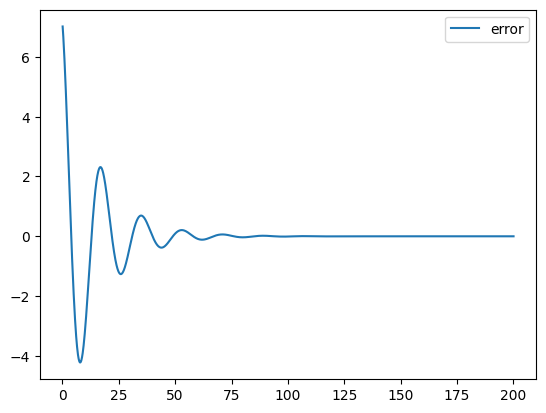

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times, env.outputs[:,0], label='error')
ax.legend()

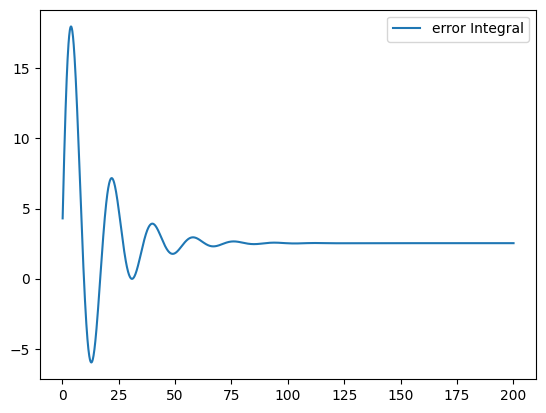

In [35]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[1:], env.outputs[1:,1], label='error Integral')
ax.legend()

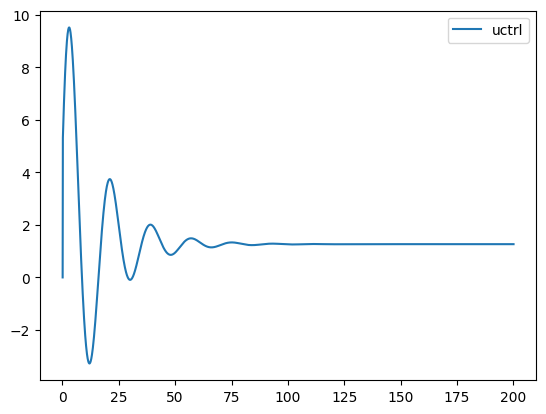

In [42]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[:], env.inputs[:,0], label='uctrl')
ax.legend()

In [37]:
for i in range(100000):
    env.getReward(action,obs)

IndexError: invalid index to scalar variable.

In [ ]:
env.inputs

array([[ 0.00000000e+00,  1.00000000e+01],
       [ 3.67095180e+02,  1.00000000e+01],
       [ 3.96090227e+02,  1.00000000e+01],
       ...,
       [-3.43685170e+40,  1.00000000e+01],
       [-3.43685170e+40,  1.00000000e+01],
       [-3.43685170e+40,  1.00000000e+01]])

In [ ]:
env.outputs

array([[  7.017298  ,   3.60077882],
       [ -1.2178169 ,   3.97308044],
       [-11.00826287,   3.41388727],
       ...,
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan]])

In [ ]:
env.times

array([[1.000e-01],
       [2.000e-01],
       [3.000e-01],
       ...,
       [1.999e+02],
       [2.000e+02],
       [2.001e+02]])

In [ ]:
env.stepCount

2000